In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, log_loss
import warnings
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 모든 경고 메시지 무시
warnings.filterwarnings('ignore')

# 데이터 로드 및 전처리
df = pd.read_csv('C:/Users/user/Desktop/ML_project/data.csv')
df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [5]:
encoder = LabelEncoder()
df["Target"] = encoder.fit_transform(df["Target"])

In [5]:
data = df.drop(columns=['Target'])
target = df['Target']

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)


In [7]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

\# 1

Random Forest's accuracy : 0.7593
Random Forest's log loss : 0.6509
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       316
           1       0.49      0.29      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



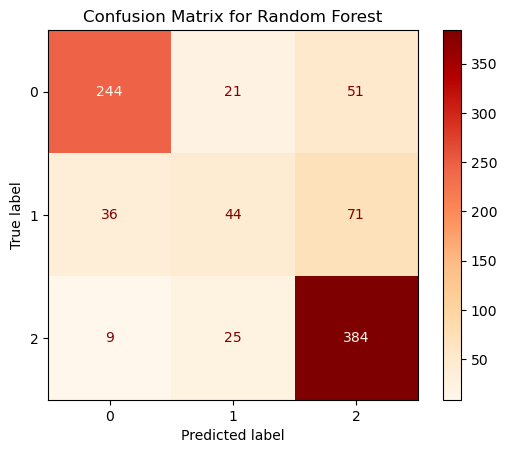

-----------------------------------------------------
Gradient Boosting's accuracy : 0.7616
Gradient Boosting's log loss : 0.5928
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       316
           1       0.47      0.32      0.38       151
           2       0.78      0.92      0.85       418

    accuracy                           0.76       885
   macro avg       0.69      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885



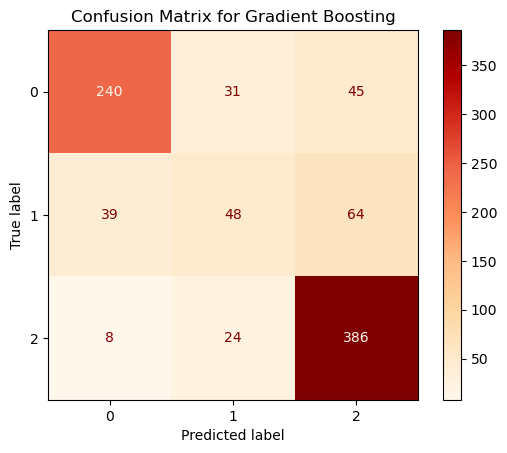

-----------------------------------------------------
XGBoost's accuracy : 0.7695
XGBoost's log loss : 0.6809
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       316
           1       0.52      0.43      0.47       151
           2       0.79      0.91      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.70       885
weighted avg       0.76      0.77      0.76       885



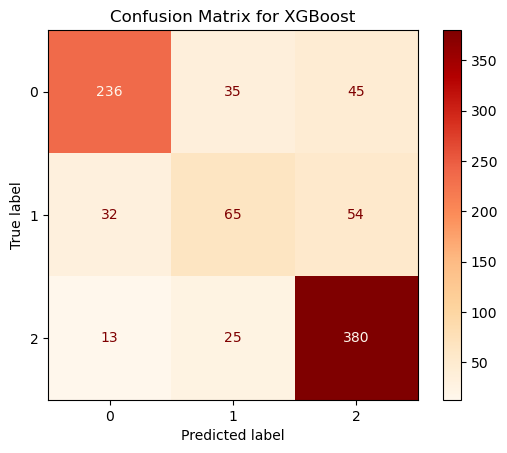

-----------------------------------------------------


In [8]:
rfc = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state =42)

models = [rfc, gbc, xgb]
names = ['Random Forest', 'Gradient Boosting', 'XGBoost']
accuracy_list_train = []
accuracy_list_test = []
log_loss_list = []

for name, model in zip(names, models):
    model.fit(train_input, train_target)
    y_pred = model.predict(test_input)
    y_pred_proba = model.predict_proba(test_input)

    accuracy = accuracy_score(test_target, y_pred)
    loss = log_loss(test_target, y_pred_proba)

    accuracy_list_test.append(accuracy)
    log_loss_list.append(loss)

    print(f"{name}\'s accuracy : {round(accuracy,4)}")
    print(f"{name}\'s log loss : {round(loss,4)}")
    print(classification_report(test_target,y_pred))
    ConfusionMatrixDisplay.from_estimator(model, test_input, test_target,cmap='OrRd')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    print('-----------------------------------------------------')

In [9]:
result = pd.DataFrame({'Model':names, 'accuracy':accuracy_list})
result

,Model,accuracy
0,Random Forest,0.759322
1,Gradient Boosting,0.761582
2,XGBoost,0.769492


In [10]:
loss = pd.DataFrame({'Model':names, 'loss':log_loss_list})
loss

,Model,loss
0,Random Forest,0.650949
1,Gradient Boosting,0.592841
2,XGBoost,0.680944


\# 2. OverSampling

In [11]:
df['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

In [12]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
data, target = os.fit_resample(data, target)

In [13]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

Random Forest's accuracy : 0.8891
Random Forest's log loss : 0.3423
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       444
           1       0.84      0.95      0.89       439
           2       0.89      0.86      0.88       443

    accuracy                           0.89      1326
   macro avg       0.89      0.89      0.89      1326
weighted avg       0.89      0.89      0.89      1326



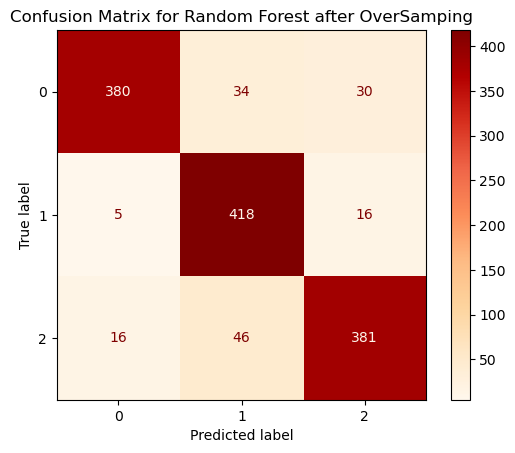

-----------------------------------------------------
Gradient Boosting's accuracy : 0.773
Gradient Boosting's log loss : 0.5786
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       444
           1       0.70      0.77      0.73       439
           2       0.76      0.82      0.79       443

    accuracy                           0.77      1326
   macro avg       0.78      0.77      0.77      1326
weighted avg       0.78      0.77      0.77      1326



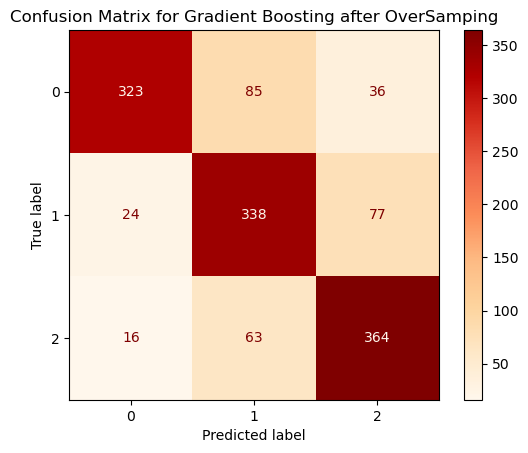

-----------------------------------------------------
XGBoost's accuracy : 0.8786
XGBoost's log loss : 0.3268
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       444
           1       0.80      0.95      0.87       439
           2       0.91      0.84      0.88       443

    accuracy                           0.88      1326
   macro avg       0.89      0.88      0.88      1326
weighted avg       0.89      0.88      0.88      1326



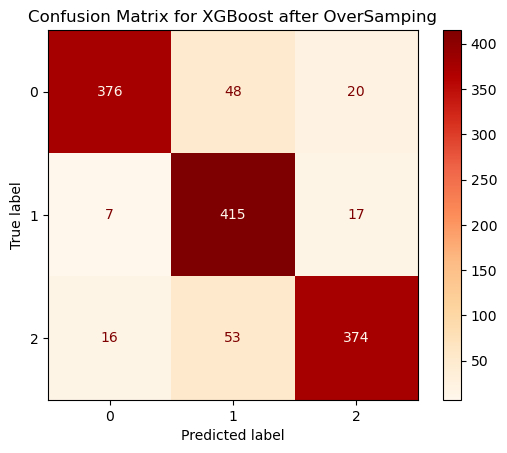

-----------------------------------------------------


In [14]:
Over_accuracy_list = []
Over_log_loss_list = []

for name, model in zip(names, models):
    model.fit(train_input,train_target)
    y_pred= model.predict(test_input)
    y_pred_proba = model.predict_proba(test_input)

    accuracy = accuracy_score(test_target, y_pred)
    log_loss_list = log_loss(test_target, y_pred_proba)
    
    Over_accuracy_list.append(accuracy)
    Over_log_loss_list.append(log_loss_list)

    print(f"{name}\'s accuracy : {round(accuracy,4)}")
    print(f"{name}\'s log loss : {round(log_loss_list, 4)}")
    print(classification_report(test_target,y_pred))
    ConfusionMatrixDisplay.from_estimator(model, test_input, test_target,cmap='OrRd')
    plt.title(f'Confusion Matrix for {name} after OverSamping')
    plt.show()
    print('-----------------------------------------------------')

In [15]:
result['OverSamping_accuracy'] = Over_accuracy_list
result

,Model,accuracy,OverSamping_accuracy
0,Random Forest,0.759322,0.889140
1,Gradient Boosting,0.761582,0.773002
2,XGBoost,0.769492,0.878582


In [16]:
loss['OverSamping_loss'] = Over_log_loss_list
loss

,Model,loss,OverSamping_loss
0,Random Forest,0.650949,0.342280
1,Gradient Boosting,0.592841,0.578644
2,XGBoost,0.680944,0.326806


\# 3. 하이퍼파라미터 튜닝

\- RandomForest

In [17]:
params = {'n_estimators': [100, 300],
    'max_depth': [2, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]}

grid_search_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=params ,cv=5,return_train_score=True ,n_jobs=3,scoring="accuracy")
grid_search_rfc.fit(train_input, train_target)

print(f"Best parameters for rfc: {grid_search_rfc.best_params_}")
print(f"Best score for rfc:{grid_search_rfc.score(test_input, test_target)}")
print(f"Internal Accuracy: {np.mean(grid_search_rfc.cv_results_['mean_train_score'])}")

Best parameters for rfc: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}
Best score for rfc:0.8906485671191554
Internal Accuracy: 0.7290173496643775


              precision    recall  f1-score   support

           0       0.95      0.85      0.90       444
           1       0.84      0.96      0.89       439
           2       0.90      0.86      0.88       443

    accuracy                           0.89      1326
   macro avg       0.89      0.89      0.89      1326
weighted avg       0.90      0.89      0.89      1326

0.8906%
Cross-Entropy Loss: 0.33


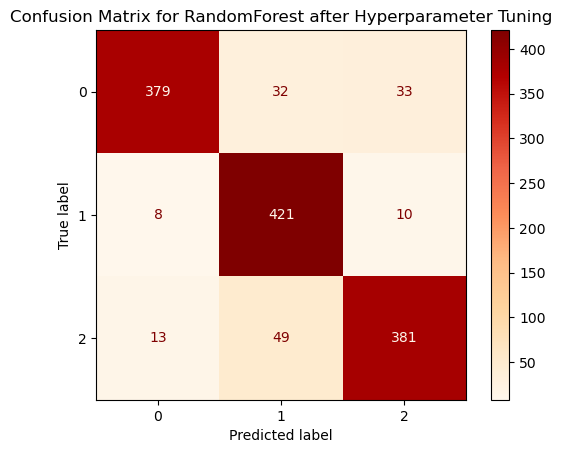

In [18]:
best_rfc = grid_search_rfc.best_estimator_
y_pred = best_rfc.predict(test_input)
y_pred_proba = best_rfc.predict_proba(test_input)  # 확률 예측값 계산
print(classification_report(test_target, y_pred))
rfc_acc =accuracy_score(test_target, y_pred)
print(f"{rfc_acc:.4f}%")

# 크로스엔트로피 손실 계산
rfc_loss = log_loss(test_target, y_pred_proba)
print(f"Cross-Entropy Loss: {rfc_loss:.2f}")

ConfusionMatrixDisplay.from_estimator(best_rfc, test_input, test_target,cmap='OrRd')
plt.title(f'Confusion Matrix for RandomForest after Hyperparameter Tuning')
plt.show()

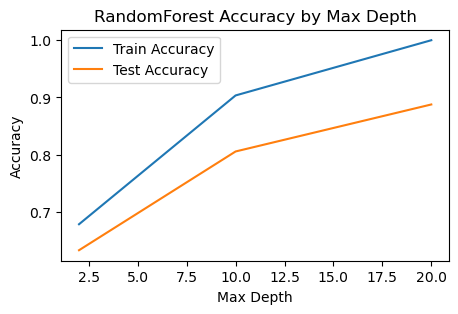

In [19]:
# Max_depth
train_scores = []
test_scores = []

for depth in [2,10,20]:
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot([2,10,20], train_scores, label='Train Accuracy')
plt.plot([2,10,20], test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RandomForest Accuracy by Max Depth')
plt.show()


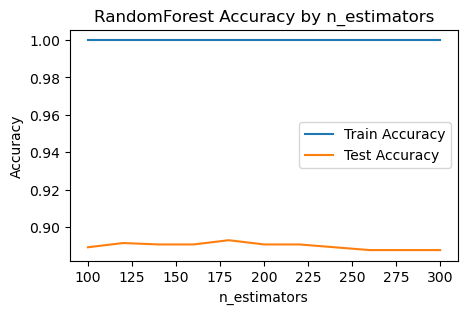

In [20]:
# 'n_estimators': [100, 300]
train_scores = []
test_scores = []

for n in range(100,310,20):
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot(range(100,310,20), train_scores, label='Train Accuracy')
plt.plot(range(100,310,20), test_scores, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RandomForest Accuracy by n_estimators')
plt.show()


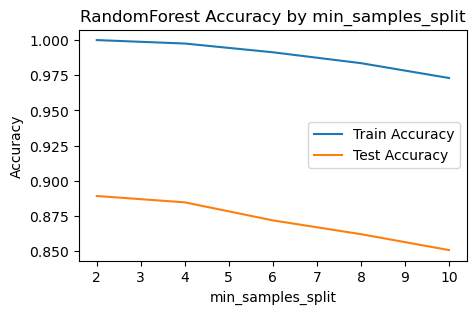

In [21]:
# 'min_samples_split': [2, 5, 10],

train_scores = []
test_scores = []

for n in range(2,12,2):
    model = RandomForestClassifier(min_samples_split=n, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot(range(2,12,2), train_scores, label='Train Accuracy')
plt.plot(range(2,12,2), test_scores, label='Test Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RandomForest Accuracy by min_samples_split')
plt.show()


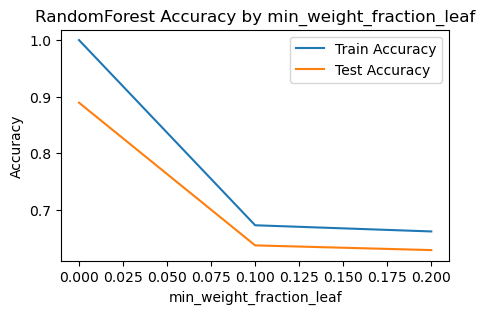

In [22]:
# 'min_weight_fraction_leaf': [0.0, 0.1, 0.2]

train_scores = []
test_scores = []

for n in [0.0, 0.1, 0.2]:
    model = RandomForestClassifier(min_weight_fraction_leaf=n, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot([0.0, 0.1, 0.2], train_scores, label='Train Accuracy')
plt.plot([0.0, 0.1, 0.2], test_scores, label='Test Accuracy')
plt.xlabel('min_weight_fraction_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RandomForest Accuracy by min_weight_fraction_leaf')
plt.show()

 내부 교차 검증에서의 성능이 낮고, 테스트 데이터에서의 성능이 높다면, 데이터 샘플링이나 평가 과정에서 문제가 있을 수 있다.

\- Gradient Boost

In [23]:
params = {
    'n_estimators': [50,100, 200],      
    'learning_rate': [0.05, 0.1, 0.5],      
    'max_depth': [3, 4, 5]               
} 

grid_search_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=params ,cv=5,return_train_score=True ,n_jobs=4,scoring="accuracy")

grid_search_gbc.fit(train_input, train_target)

print(f"Best parameters for gbc: {grid_search_gbc.best_params_}")
print(f"Best score for gbc:{grid_search_gbc.score(test_input, test_target)}")
print(f"Internal Accuracy: {np.mean(grid_search_gbc.cv_results_['mean_train_score'])}")

Best parameters for gbc: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}
Best score for gbc:0.8868778280542986
Internal Accuracy: 0.9039403185534838


              precision    recall  f1-score   support

           0       0.93      0.85      0.89       444
           1       0.83      0.96      0.89       439
           2       0.91      0.85      0.88       443

    accuracy                           0.89      1326
   macro avg       0.89      0.89      0.89      1326
weighted avg       0.89      0.89      0.89      1326

0.8869%
Cross-Entropy Loss: 0.43


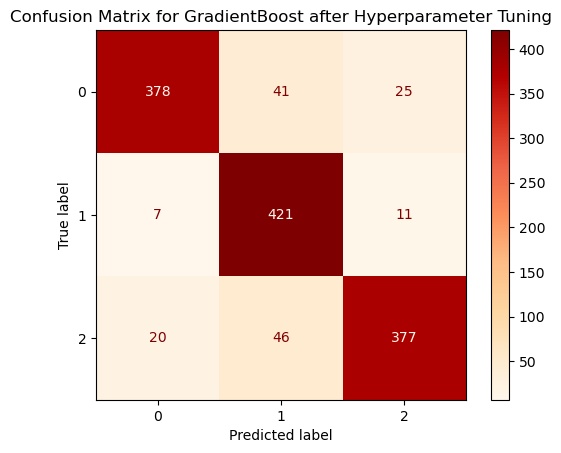

In [24]:
best_gbc = grid_search_gbc.best_estimator_
y_pred = best_gbc.predict(test_input)
y_pred_proba = best_gbc.predict_proba(test_input)
print(classification_report(test_target, y_pred))
gbc_acc =accuracy_score(test_target, y_pred)
print(f"{gbc_acc:.4f}%")

gbc_loss = log_loss(test_target, y_pred_proba)
print(f"Cross-Entropy Loss: {gbc_loss:.2f}")

ConfusionMatrixDisplay.from_estimator(best_gbc, test_input, test_target,cmap='OrRd')
plt.title(f'Confusion Matrix for GradientBoost after Hyperparameter Tuning')
plt.show()

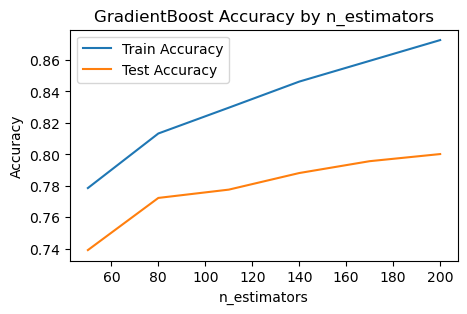

In [25]:
# 'n_estimators': [50,100, 200]

train_scores = []
test_scores = []

for n in range(50,210,30):
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot(range(50,210,30), train_scores, label='Train Accuracy')
plt.plot(range(50,210,30), test_scores, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('GradientBoost Accuracy by n_estimators')
plt.show()

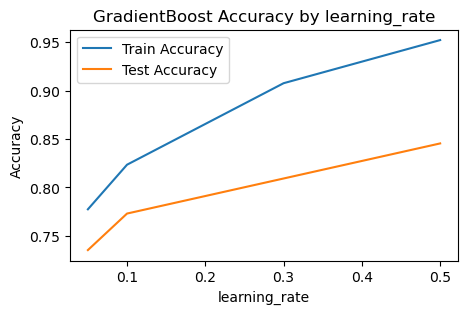

In [26]:
# 'learning_rate': [0.05, 0.1, 0.5]

train_scores = []
test_scores = []

for n in [0.05, 0.1, 0.3,0.5]:
    model = GradientBoostingClassifier(learning_rate=n, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot([0.05, 0.1,0.3, 0.5], train_scores, label='Train Accuracy')
plt.plot([0.05, 0.1,0.3, 0.5], test_scores, label='Test Accuracy')
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.legend()
plt.title('GradientBoost Accuracy by learning_rate')
plt.show()

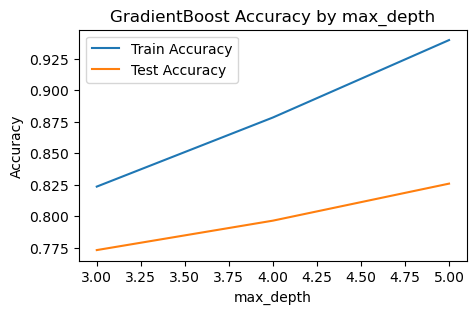

In [27]:
# 'max_depth': [3, 4, 5]  

train_scores = []
test_scores = []

for n in [3, 4, 5]:
    model = GradientBoostingClassifier(max_depth=n, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot([3, 4, 5], train_scores, label='Train Accuracy')
plt.plot([3, 4, 5], test_scores, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('GradientBoost Accuracy by max_depth')
plt.show()

훈련 데이터에서의 성능과 테스트 데이터에서의 성능이 매우 유사.  
이는 모델이 잘 일반화되었다는 것을 의미  
예측 성능이 신뢰할 만한 수준

\- XGBoost

In [28]:
params = {
    'n_estimators': [100,200,300],  
    'max_depth': [10,15,20],  
    'learning_rate': [0.05, 0.1, 0.3, 0.5],
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

grid_search_xgb = GridSearchCV(XGBClassifier(),param_grid=params, cv=2,return_train_score=True, n_jobs=-1,scoring="accuracy")
grid_search_xgb.fit(train_input, train_target)

print(f"Best parameters for xgb: {grid_search_xgb.best_params_}")
print(f"Best score for xgb:{grid_search_xgb.score(test_input,test_target)}")
print(f"Internal Accuracy: {np.mean(grid_search_xgb.cv_results_['mean_train_score'])}")

Best parameters for xgb: {'alpha': 0.001, 'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 300}
Best score for xgb:0.8921568627450981
Internal Accuracy: 0.9806891145859282


              precision    recall  f1-score   support

           0       0.94      0.87      0.90       444
           1       0.85      0.94      0.90       439
           2       0.89      0.86      0.88       443

    accuracy                           0.89      1326
   macro avg       0.89      0.89      0.89      1326
weighted avg       0.89      0.89      0.89      1326

0.8922%
Cross-Entropy Loss: 0.37


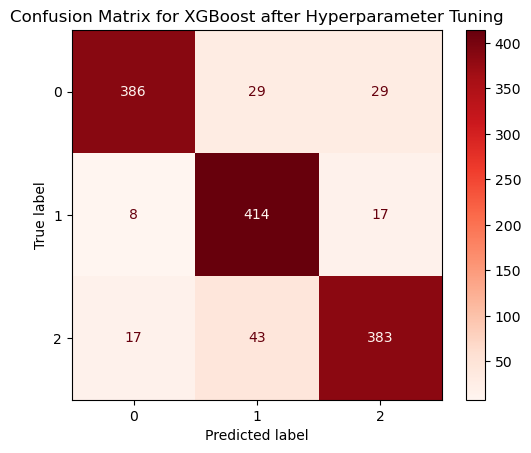

In [29]:
best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(test_input)
y_pred_proba = best_xgb.predict_proba(test_input)
print(classification_report(test_target, y_pred))
xgb_acc =accuracy_score(test_target, y_pred)
print(f"{xgb_acc:.4f}%")

xgb_loss = log_loss(test_target, y_pred_proba)
print(f"Cross-Entropy Loss: {xgb_loss:.2f}")

ConfusionMatrixDisplay.from_estimator(best_xgb, test_input, test_target,cmap='Reds')
plt.title(f'Confusion Matrix for XGBoost after Hyperparameter Tuning')
plt.show()

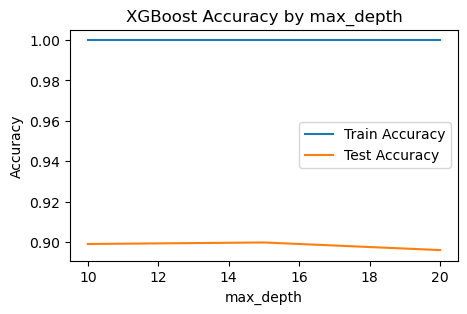

In [30]:
# 'max_depth'  

train_scores = []
test_scores = []

for n in [10,15,20]:
    model = XGBClassifier(max_depth=n, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot([10,15,20], train_scores, label='Train Accuracy')
plt.plot([10,15,20], test_scores, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('XGBoost Accuracy by max_depth')
plt.show()

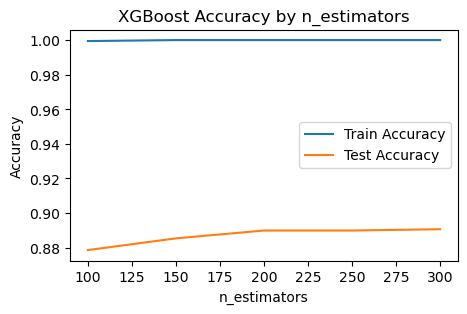

In [31]:
# 'n_estimators': [100,200,300]

train_scores = []
test_scores = []

for n in np.arange(100,310,50):
    model = XGBClassifier(n_estimators=n, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot(np.arange(100,310,50), train_scores, label='Train Accuracy')
plt.plot(np.arange(100,310,50), test_scores, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('XGBoost Accuracy by n_estimators')
plt.show()

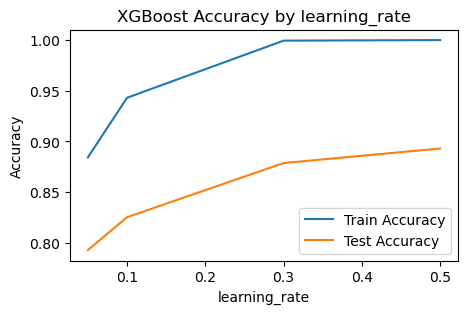

In [32]:
# 'learning_rate': [0.05, 0.1, 0.3, 0.5]

train_scores = []
test_scores = []

for n in [0.05, 0.1, 0.3, 0.5]:
    model = XGBClassifier(learning_rate=n, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot([0.05, 0.1, 0.3, 0.5], train_scores, label='Train Accuracy')
plt.plot([0.05, 0.1, 0.3, 0.5], test_scores, label='Test Accuracy')
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.legend()
plt.title('XGBoost Accuracy by learning_rate')
plt.show()

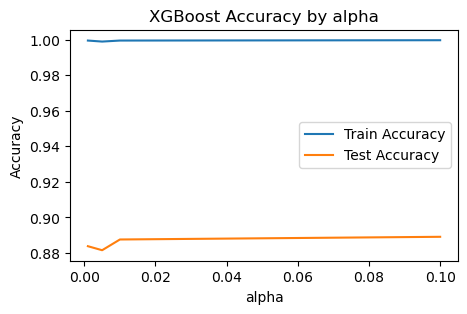

In [33]:
# 'alpha'

train_scores = []
test_scores = []

for n in [0.001, 0.005,0.01, 0.1]:
    model = XGBClassifier(alpha=n, random_state=42)
    model.fit(train_input, train_target)
    train_scores.append(model.score(train_input, train_target))
    test_scores.append(model.score(test_input, test_target))

plt.figure(figsize=(5, 3))
plt.plot([0.001, 0.005,0.01, 0.1], train_scores, label='Train Accuracy')
plt.plot([0.001, 0.005,0.01, 0.1], test_scores, label='Test Accuracy')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('XGBoost Accuracy by alpha')
plt.show()

차이가 너무 크다면 모델이 과적합(overfitting)되었을 가능성이 있다.  
그러나, 현재의 경우 정확도 차이가 크게 과도하지 않으므로 과적합이 심각하지는 않은 것으로 보인다.  

In [34]:
result['Hyper_Accuracy']=[rfc_acc, gbc_acc, xgb_acc]
result['Internal Accuracy(Hyper)']=[np.mean(grid_search_rfc.cv_results_['mean_train_score']),
                                    np.mean(grid_search_gbc.cv_results_['mean_train_score']),
                                    np.mean(grid_search_xgb.cv_results_['mean_train_score'])]

result

,Model,accuracy,OverSamping_accuracy,Hyper_Accuracy,Internal Accuracy(Hyper)
0,Random Forest,0.759322,0.889140,0.890649,0.729017
1,Gradient Boosting,0.761582,0.773002,0.886878,0.903940
2,XGBoost,0.769492,0.878582,0.892157,0.980689


In [35]:
loss['Hyper_loss']=[rfc_loss, gbc_loss, xgb_loss]
loss

,Model,loss,OverSamping_loss,Hyper_loss
0,Random Forest,0.650949,0.342280,0.334073
1,Gradient Boosting,0.592841,0.578644,0.434112
2,XGBoost,0.680944,0.326806,0.366635


\# 손실

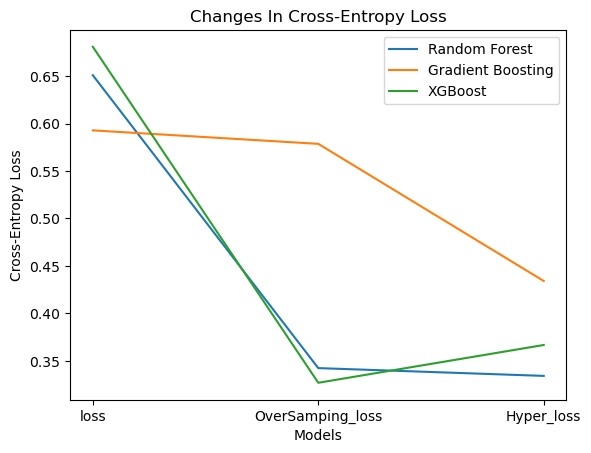

In [36]:
import matplotlib.pyplot as plt

# 데이터 설정
x = [1, 2, 3]
y1 = [loss['loss'][0], loss['OverSamping_loss'][0], loss['Hyper_loss'][0]]
y2 = [loss['loss'][1], loss['OverSamping_loss'][1], loss['Hyper_loss'][1]]
y3 = [loss['loss'][2], loss['OverSamping_loss'][2], loss['Hyper_loss'][2]]

# 그래프 생성
plt.plot(x, y1, label='Random Forest')
plt.plot(x, y2, label='Gradient Boosting')
plt.plot(x, y3, label='XGBoost')

# 그래프에 레이블 추가
plt.xticks(x, ['loss', 'OverSamping_loss', 'Hyper_loss'])
plt.xlabel('Models')
plt.ylabel('Cross-Entropy Loss')
plt.title('Changes In Cross-Entropy Loss')
plt.legend()

# 그래프 표시
plt.show()

\# 정확도 비교 그래프

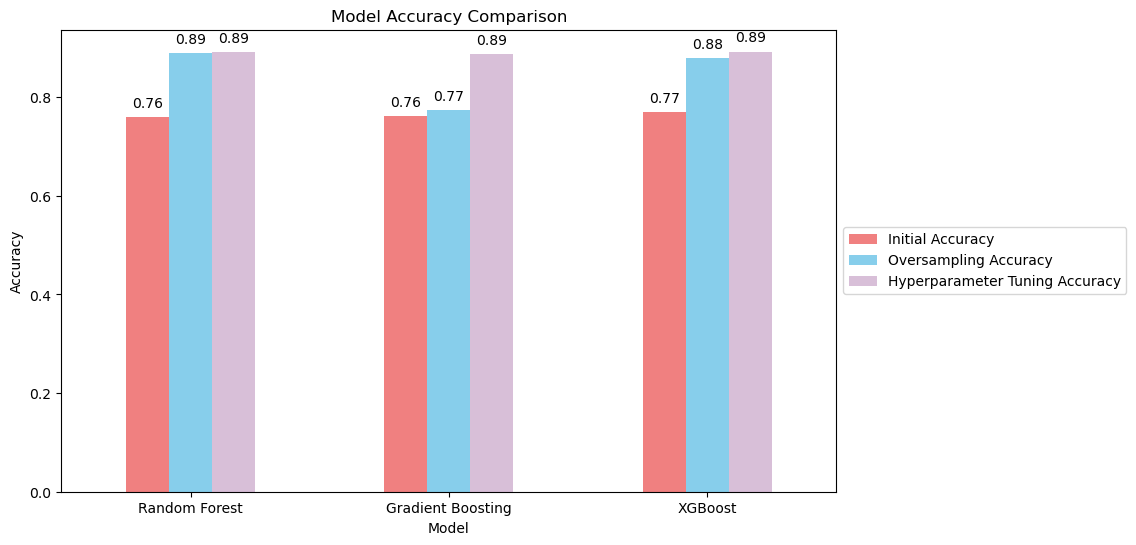

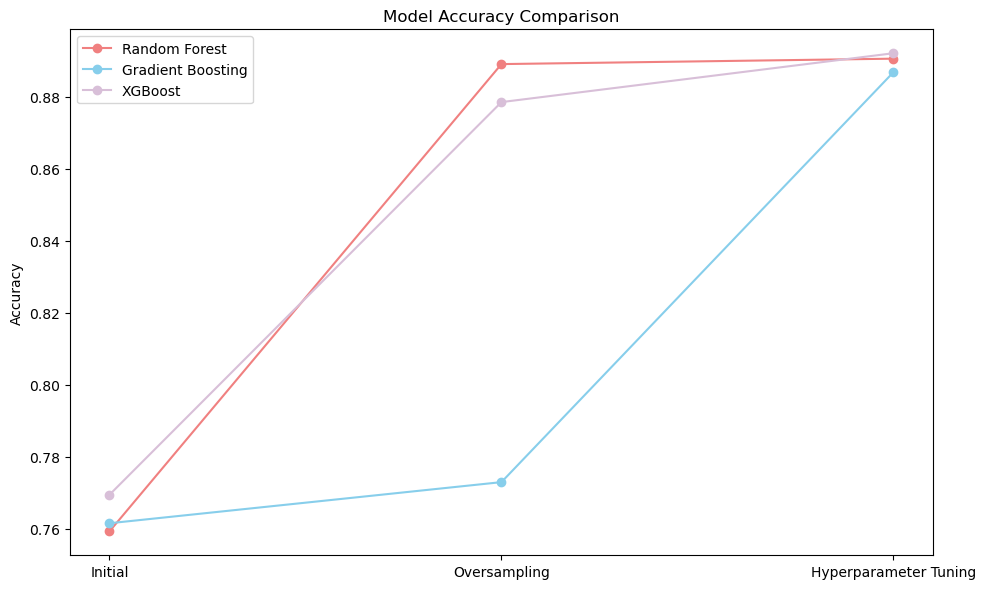

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임 생성
result = pd.DataFrame({
    'Model': names,
    'Initial Accuracy': accuracy_list,
    'Oversampling Accuracy': Over_accuracy_list,
    'Hyperparameter Tuning Accuracy': [rfc_acc, gbc_acc, xgb_acc]
})
# 바 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['lightcoral', 'skyblue', 'thistle']  # 연핑크, 스카이블루, 연보라 색상
result.plot(kind='bar', x='Model', ax=ax, color=colors)
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
plt.xticks(rotation=0)
# 막대 그래프에 값 표시 (소수점 두 자리까지)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# 범례 설명을 그래프 밖으로 빼기
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 라인 그래프 그리기
# 각 모델의 정확도 리스트 준비
rfc_accuracy = [result.loc[result['Model'] == 'Random Forest', 'Initial Accuracy'].values[0],
                result.loc[result['Model'] == 'Random Forest', 'Oversampling Accuracy'].values[0],
                result.loc[result['Model'] == 'Random Forest', 'Hyperparameter Tuning Accuracy'].values[0]]
gbc_accuracy = [result.loc[result['Model'] == 'Gradient Boosting', 'Initial Accuracy'].values[0],
                result.loc[result['Model'] == 'Gradient Boosting', 'Oversampling Accuracy'].values[0],
                result.loc[result['Model'] == 'Gradient Boosting', 'Hyperparameter Tuning Accuracy'].values[0]]
xgb_accuracy = [result.loc[result['Model'] == 'XGBoost', 'Initial Accuracy'].values[0],
                result.loc[result['Model'] == 'XGBoost', 'Oversampling Accuracy'].values[0],
                result.loc[result['Model'] == 'XGBoost', 'Hyperparameter Tuning Accuracy'].values[0]]
# 라인 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
# 각 모델의 정확도를 라인 그래프로 플로팅
ax.plot(['Initial', 'Oversampling', 'Hyperparameter Tuning'], rfc_accuracy, marker='o', linestyle='-', color='lightcoral', label='Random Forest')
ax.plot(['Initial', 'Oversampling', 'Hyperparameter Tuning'], gbc_accuracy, marker='o', linestyle='-', color='skyblue', label='Gradient Boosting')
ax.plot(['Initial', 'Oversampling', 'Hyperparameter Tuning'], xgb_accuracy, marker='o', linestyle='-', color='thistle', label='XGBoost')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

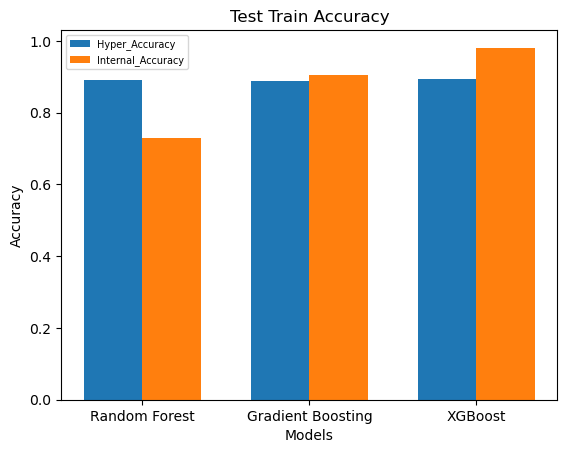

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 설정
models = ['Random Forest', 'Gradient Boosting', 'XGBoost']
Hyper_Accuracy = [rfc_acc, gbc_acc, xgb_acc]
Internal_Accuracy = [np.mean(grid_search_rfc.cv_results_['mean_train_score']),
                    np.mean(grid_search_gbc.cv_results_['mean_train_score']),
                    np.mean(grid_search_xgb.cv_results_['mean_train_score'])]

# x축의 위치 설정
x = np.arange(len(models))  # 모델의 개수만큼 위치 생성
width = 0.35  # 막대의 너비 설정

# 그래프 생성
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, Hyper_Accuracy, width, label='Hyper_Accuracy')
bars2 = ax.bar(x + width/2, Internal_Accuracy, width, label='Internal_Accuracy')

# x축 눈금 레이블 설정
ax.set_xticks(x)
ax.set_xticklabels(models)

# 그래프에 레이블 추가
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Test Train Accuracy')

# 범례 위치 및 크기 설정
ax.legend(loc='upper left', fontsize=7)  # 크기를 10으로 설정

# 그래프 표시
plt.show()

In [39]:
train_input = pd.DataFrame(train_input)

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.114856
31                Curricular units 2nd sem (grade)    0.103521
24             Curricular units 1st sem (approved)    0.072565
25                Curricular units 1st sem (grade)    0.064568
12                                 Admission grade    0.046960
29          Curricular units 2nd sem (evaluations)    0.045173
23          Curricular units 1st sem (evaluations)    0.041910
6                   Previous qualification (grade)    0.041555
19                               Age at enrollment    0.039910
3                                           Course    0.035993
16                         Tuition fees up to date    0.035004
11                             Father's occupation    0.031414
10                             Mother's occupation    0.029202
35                                             GDP    0.027488
33                               Unemployment rate    0

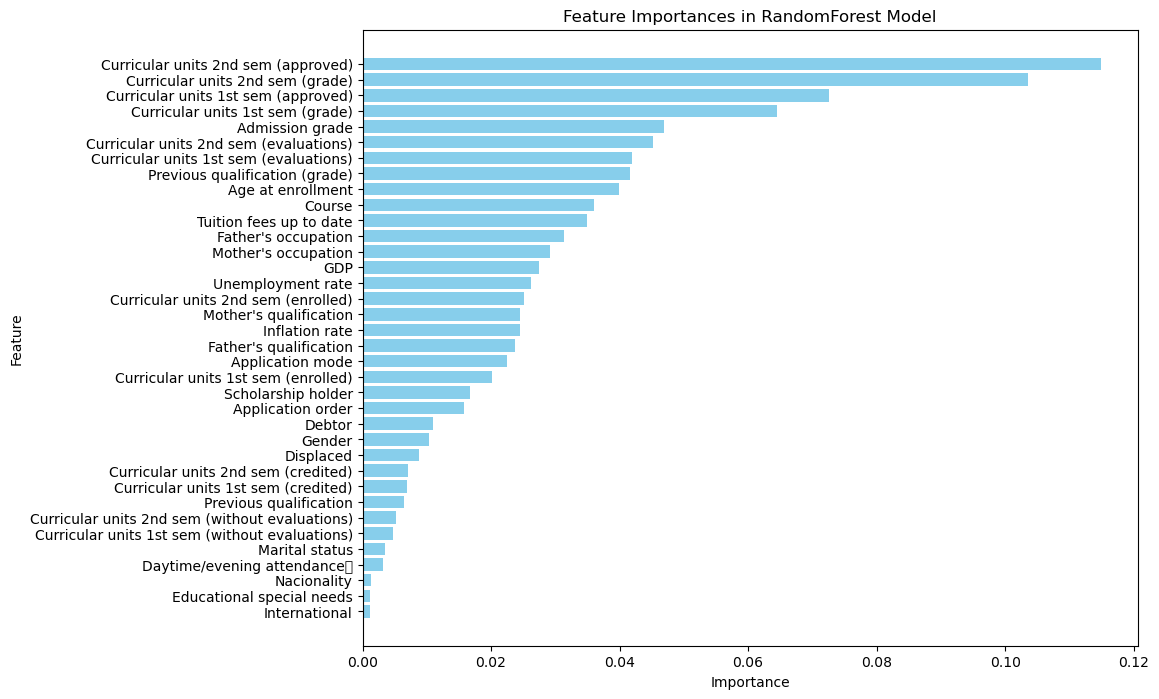

In [43]:
# RandomForest의 특성중요도
import pandas as pd
import matplotlib.pyplot as plt

# 특성 중요도 계산
feature_names = df.columns[train_input.columns]
feature_importances = best_rfc.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 특성 중요도 데이터프레임 출력
print(feature_importances_df.to_string())

# 가로 막대그래프 그리기
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForest Model')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬하기 위해 y축을 뒤집음
plt.show()


                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.342669
31                Curricular units 2nd sem (grade)    0.056312
16                         Tuition fees up to date    0.053110
23          Curricular units 1st sem (evaluations)    0.052532
12                                 Admission grade    0.041132
19                               Age at enrollment    0.035839
29          Curricular units 2nd sem (evaluations)    0.035256
25                Curricular units 1st sem (grade)    0.035219
28             Curricular units 2nd sem (enrolled)    0.034273
6                   Previous qualification (grade)    0.032861
3                                           Course    0.031508
24             Curricular units 1st sem (approved)    0.031430
10                             Mother's occupation    0.025921
35                                             GDP    0.024400
34                                  Inflation rate    0

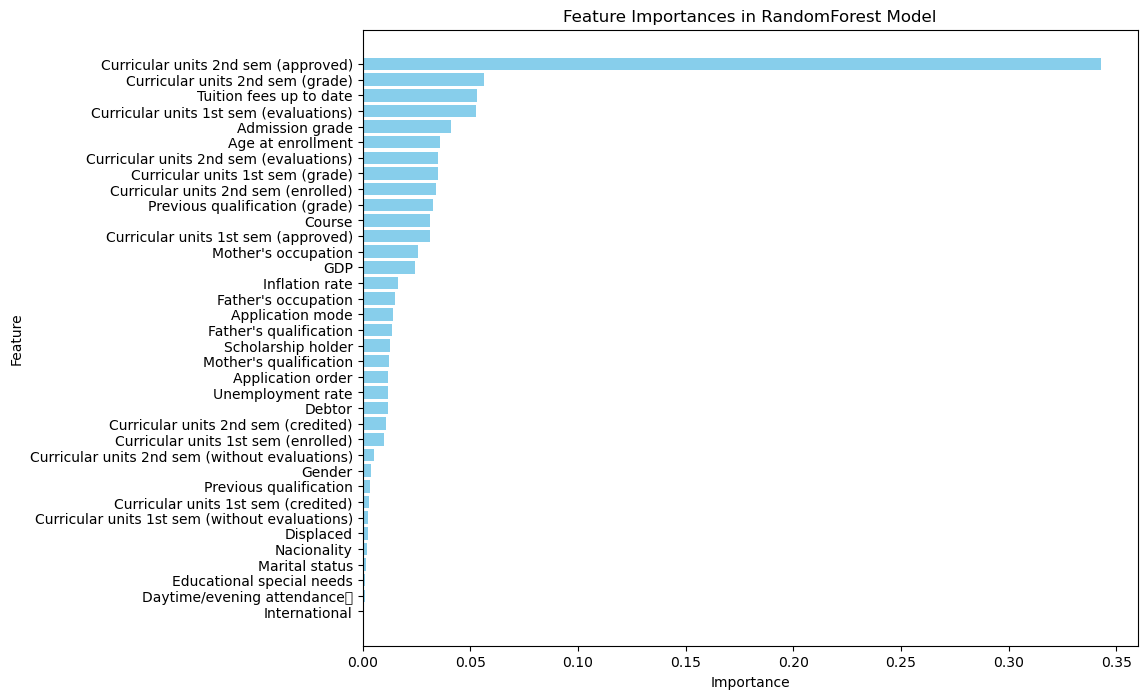

In [45]:
# GradientBoost의 특성중요도

import pandas as pd
import matplotlib.pyplot as plt

# 특성 중요도 계산
feature_names = df.columns[train_input.columns]
feature_importances = best_gbc.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 특성 중요도 데이터프레임 출력
print(feature_importances_df.to_string())

# 가로 막대그래프 그리기
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForest Model')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬하기 위해 y축을 뒤집음
plt.show()


                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.160897
14                       Educational special needs    0.149552
16                         Tuition fees up to date    0.114945
27             Curricular units 2nd sem (credited)    0.047120
22             Curricular units 1st sem (enrolled)    0.037453
7                                      Nacionality    0.037399
15                                          Debtor    0.032488
23          Curricular units 1st sem (evaluations)    0.026573
28             Curricular units 2nd sem (enrolled)    0.025953
32  Curricular units 2nd sem (without evaluations)    0.024597
18                              Scholarship holder    0.021343
24             Curricular units 1st sem (approved)    0.020392
0                                   Marital status    0.020298
21             Curricular units 1st sem (credited)    0.020075
29          Curricular units 2nd sem (evaluations)    0

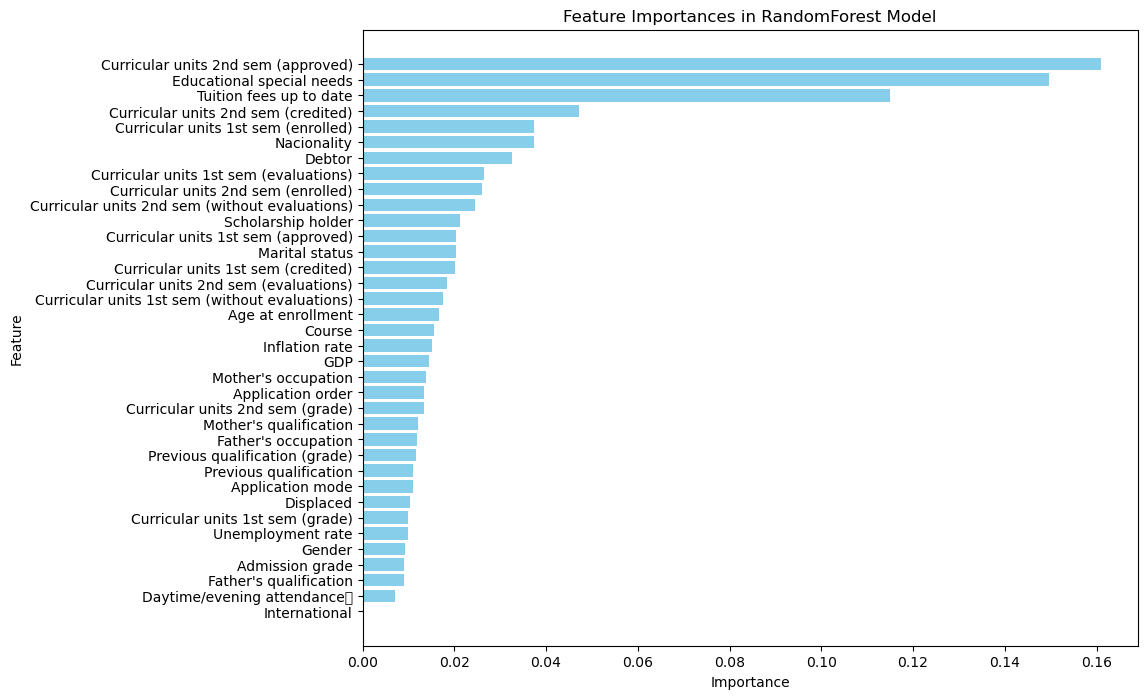

In [46]:
# XGBoost의 특성중요도

import pandas as pd
import matplotlib.pyplot as plt

# 특성 중요도 계산
feature_names = df.columns[train_input.columns]
feature_importances = best_xgb.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 특성 중요도 데이터프레임 출력
print(feature_importances_df.to_string())

# 가로 막대그래프 그리기
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForest Model')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬하기 위해 y축을 뒤집음
plt.show()
